# **Final Exam - Deep Network Development**



# **Exam Information**

---

- **Name:** *Mir Mohibullah Sazid*
- **Neptun ID:** *<GVFPV8>*
- **Date:** *18/12/2024*
- **Duration:** *9:00 AM – 11:00 AM*
- **Instructions:** *Please fill in your details above before starting the exam. Ensure you adhere to the allotted time.*



## **General Rules**

This notebook contains the task to be completed in order to pass the exam and the course. The task consists of:
1. **Implementing a network architecture**, including its **forward pass** function.
2. Additional **optional requirements** for bonus points towards final grade.

---

### **Exam Duration**
- You have **2 hours** to complete the exam.
- You may distribute the time as you see fit between the required and optional parts.

---

### **Allowed and Prohibited Resources**
- **Allowed**:
  - The **internet**.
  - **AI tools**.
  - **Practice notebooks**.
- **Prohibited**:
  - Any form of **communication** (e.g., Teams, WhatsApp, Messenger, etc.).  
  - **Violation** will result in an immediate **FAIL** of the exam.

---

### **Submission Guidelines**
- Submit your solution as a **`.ipynb` file** on **Canvas**.
- To **PASS**, your solution must:
  1. **Satisfy the minimum requirements** (i.e., a working implementation of the network architecture and forward pass).
  2. Be **submitted on time**.
  3. Be prepared to **orally defend your code** after submission.

---

### **Exam Retake Policy**
- If you **FAIL**, you are allowed **one retry**.  
- If you **FAIL AGAIN**, you will have **failed the course**.  

---

### **Grading**
- If you **PASS**, your final grade will be the **weighted average** of your assignment defenses (theory and code).

---

Good luck, and ensure you follow all the rules!


## **Task Description**

Your task is to implement a custom neural network architecture along with its forward pass function.

This task is inspired by **spectrogram processing**, where a spectrogram represents the frequency content of an audio signal over time. Spectrograms are typically generated using transformations such as the **Wavelet Transform** or the **Fourier Transform**, resulting in a matrix representation. This representation can often be reshaped into a format such as **(2, X, Y)**, where:
- **2** represents the stereo audio channels (left and right).
- **X** corresponds to the frequency bins, capturing the range of frequencies in the audio signal.
- **Y** represents the time intervals, showing how frequencies evolve over time.

For this task, you will work with a simplified spectrogram representation in the form of a random tensor with the shape **(1, 128, 128)**:
- The **1** indicates that the audio has a **mono channel**.
- **128 × 128** corresponds to the **frequency bins** and **time intervals** of the spectrogram.

Your implemented model will:
1. Take this **stereo spectrogram tensor** as input.
2. Encode it into a **latent representation** using an encoder-decoder-like architecture.
3. Decode the latent representation to produce a **new noisy spectrogram** as the output.

The primary objective is to correctly implement the neural network architecture and its forward pass to achieve the desired functionality.



## **Requirements**

---

### **Minimum Requirements – Sufficient to Pass the Exam**
1. **Implement the layers of the architecture:**  
   Complete the architecture outlined in Section 1 by filling in the missing parts.
2. **Implement the forward function:**  
   Ensure the input and output of the forward function are correctly implemented.  
   
   **Note:** To meet these requirements, your final output must match the expected output provided in **Cell 1.2**.

---

### **Extra Requirements – For Grade Improvement and AI Lab Access**

---

3. **Fusing embeddings (Preprocessing and Postprocessing Layers):**  
   - Add **preprocessing** and **postprocessing** layers to the spectrogram network:  
     - **Preprocessing layer**: Load an actual `.wav` audio file and generate its spectrogram using a given method.  
     - **Postprocessing layer**: Convert the output spectrogram back into audio format.  
   - Integrate these layers into your network architecture to create a complete pipeline from raw audio input to processed audio output.  

   ➡️ **Reward: +1 to final grade**

---

4. **Extending the architecture with a Vision Transformer (ViT) for classification:**  
   - Use a pretrained Vision Transformer (ViT) model, such as one available on HuggingFace, to classify spectrograms.  
   - Implement this classification for:
     - The **original spectrogram** (input to your encoder-decoder network).
     - The **final spectrogram** (output from your encoder-decoder network).  
   - The classification should determine whether the original and your final spectrograms have been **spoofed** (non-human), with an associated confidence score for each prediction.  

   ➡️ **Reward: Access to AI Lab**

---

Make sure to carefully follow the instructions provided in each cell to meet the requirements!


#0. Necessary Imports and Data Loading

In [3]:
# Cell 0.1 (DO NOT EDIT THIS CELL!)

import os
import torch
import torch.nn as nn
# import torchaudio
# import torchaudio.transforms as T
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
# Cell 0.2 (DO NOT EDIT THIS CELL!)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [5]:
# Cell 0.3 (DO NOT EDIT THIS CELL!)

input_spectrogram_tensor = torch.randn(1, 1, 128, 128) # 1 channels for mono audio, 128 frequency bins with 128 frames of audio (with 10 ms hops -> 1280ms -> 1.28 secon audio) (44100Hz sampling rate with hop length of 512 samples gives ~10ms hops)
print(input_spectrogram_tensor.shape)

torch.Size([1, 1, 128, 128])


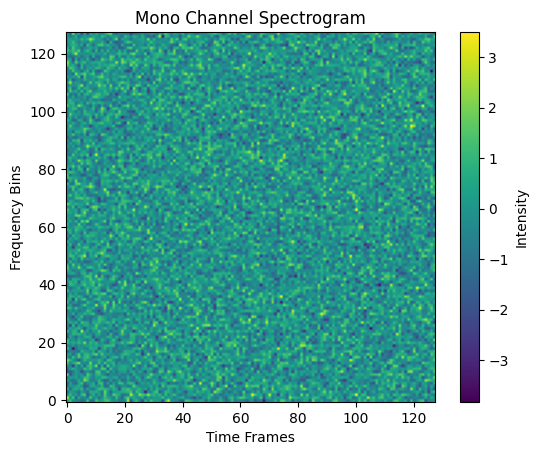

In [6]:
# Cell 0.4 (DO NOT EDIT THIS CELL!)

spectrogram_plot = input_spectrogram_tensor.squeeze(0).squeeze(0)
plt.imshow(spectrogram_plot, cmap='viridis', origin='lower')
plt.xlabel("Time Frames")
plt.ylabel("Frequency Bins")
plt.title("Mono Channel Spectrogram")
plt.colorbar(label="Intensity")
plt.show()

## **1. Architecture**

To better view the architecture diagram:  
- **Right-click the image** and select **"Open image in a new tab"** to enable zoom for a clearer view.  
- Alternatively, you can **download the image** using the link below:  
  [Download Architecture Diagram](https://drive.google.com/file/d/1Lu6_aamj0npX7tchp3UIhC-Q8abr6Ojj/view?usp=sharing)

---

### Diagram Preview:
![Architecture Diagram](https://drive.google.com/uc?export=view&id=1Lu6_aamj0npX7tchp3UIhC-Q8abr6Ojj)


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpectrogramEncoder(nn.Module):
    def __init__(self):
        super(SpectrogramEncoder, self).__init__()
        
        # First Conv Block: 1 -> 16
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  # ??? replaced with 16

        # Second Conv Block: 16 -> 32
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # ??? replaced with 32

        # After concatenation: 48 -> 128
        self.conv3 = nn.Conv2d(48, 128, kernel_size=3, stride=1, padding=2)
        
        # LSTM: input_size=128, hidden_size=256, num_layers=2, batch_first=True
        self.lstm = nn.LSTM(input_size=128, hidden_size=256, num_layers=2, batch_first=True)

    def forward(self, x):
        # Add Gaussian noise
        noise = torch.randn_like(x)
        x = x + noise

        # First conv block
        x = self.conv1(x)     # (B,16,128,128)
        x = self.bn1(x)
        x = F.relu(x)
        x_block1 = x          # Save output of first block

        # Second conv block
        x = self.conv2(x)     # (B,32,128,128)
        x = self.bn2(x)
        x = F.relu(x)

        # Concatenate along channel dimension: (16 + 32 = 48 channels)
        x = torch.cat([x_block1, x], dim=1)  # (B,48,128,128)

        # Now apply MaxPool2d
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # (B,48,64,64)

        # Third conv block (48 -> 128)
        x = self.conv3(x)     # (B,128,66,66)

        # Reshape for LSTM: (B,128,66,66) -> (B,66,66,128) -> (B,4356,128)
        x = x.permute(0, 2, 3, 1).reshape(x.size(0), 66*66, 128)

        # LSTM: (B,4356,128) -> (B,4356,256)
        out, (h,c) = self.lstm(x)
        return out


class SpectrogramDecoder(nn.Module):
    def __init__(self):
        super(SpectrogramDecoder, self).__init__()

        # Now the first conv expects in=4356 and out=2048
        self.conv1 = nn.Conv2d(4356, 2048, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(2048)

        # Second Conv: in=2048, out=1024
        self.conv2 = nn.Conv2d(2048, 1024, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(1024)

    def forward(self, x):
        B = x.size(0)  # (B,4356,256)
        
        # Slice down from 256 to 64
        x = x[:, :, :64]  # (B,4356,64)

        # Reshape to (B,4356,8,8) so that channels=4356
        x = x.view(B, 4356, 8, 8)  # (B,4356,8,8)

        # First Conv Block
        x = self.conv1(x)       # (B,2048,8,8)
        x = self.bn1(x)
        x = F.relu(x)

        # Second Conv Block
        x = self.conv2(x)       # (B,1024,8,8)
        x = self.bn2(x)
        x = torch.sigmoid(x)

        # Add dummy zeros channel
        dummy_zeros_1 = torch.zeros(B, 1, 8, 8, device=x.device, dtype=x.dtype)
        x = torch.cat([x, dummy_zeros_1], dim=1)  # (B,1025,8,8)

        # Flatten spatial dims to (B,1025,64)
        x = x.view(B, 1025, 64)

        # Add dummy zeros along last dim -> (B,1025,65)
        dummy_zeros_2 = torch.zeros(B, 1025, 1, device=x.device, dtype=x.dtype)
        x = torch.cat([x, dummy_zeros_2], dim=2)

        return x





In [23]:
# Cell 1.2 (DO NOT EDIT THIS CELL!)

spectrogram_encoder = SpectrogramEncoder()
spectrogram_decoder = SpectrogramDecoder()

encoded_spectrogram = spectrogram_encoder(input_spectrogram_tensor)
decoded_spectrogram = spectrogram_decoder(encoded_spectrogram)

print("Encoded Spectrogram Shape:", encoded_spectrogram.shape)
print("Decoded Spectrogram Shape:", decoded_spectrogram.shape)

try:
    assert encoded_spectrogram.shape == (1, 4356, 256), "Encoded spectrogram shape is incorrect."
    assert decoded_spectrogram.shape == (1, 1025, 65), "Decoded spectrogram shape is incorrect."
    print("\n🎉 Congratulations! Your implementation is correct. You passed the minimum requirement! 🎉")
except AssertionError as e:
    print(f"\n❌ Error: {e}")


Encoded Spectrogram Shape: torch.Size([1, 4356, 256])
Decoded Spectrogram Shape: torch.Size([1, 1025, 65])

🎉 Congratulations! Your implementation is correct. You passed the minimum requirement! 🎉


## **2. +1 to the Final Grade**

In this optional exercise, your task is to download and preprocess the famous Hollywood sound blip (or a similar audio file) and create a complete PyTorch pipeline for spectrogram generation and reconstruction.

### **Requirements:**

1. **Audio Preprocessing**:
   - Convert the raw audio file into a **dual-channel spectrogram** (stereo audio, with left and right channels).
   - Reduce the dual-channel spectrogram to a **mono-channel spectrogram**.
   - Apply a **logarithmic transformation** to the spectrogram values to compress the dynamic range.
   - Interpolate the spectrogram to ensure it has a fixed size of **(1, 128, 128)**, consistent with the random tensor used previously.

2. **Postprocessing Module**:
   - Create a module to transform the decoder's output tensor back into an audio waveform using the **Griffin-Lim algorithm** for inverse spectrogram transformation.
   - The reconstructed waveform should resemble the original audio as closely as possible.

3. **Implementation**:
   - Build the **preprocessing module** as a PyTorch class that takes a raw audio waveform as input and outputs a processed spectrogram.
   - Build the **postprocessing module** as a PyTorch class that takes the spectrogram tensor from the decoder and reconstructs it into an audio waveform.

---

### **Additional Resources**
To better understand the architecture and process:
- **Right-click the image** below and select **"Open image in a new tab"** for a detailed view.  
- Or, **download the architecture diagram** using the link below:  
  [Download Architecture Diagram](https://drive.google.com/file/d/1f7akT-yRvOXR89BlkdL7OsWobhLxmCD9/view?usp=sharing)

---

### **Diagram Preview**:
![Architecture Diagram](https://drive.google.com/uc?export=view&id=1f7akT-yRvOXR89BlkdL7OsWobhLxmCD9)

## **Download the .wav file and Basic Setup**

In [ ]:
# Cell 2.1 (DO NOT EDIT THIS CELL!)

!wget -qq --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wm0NJ4KgpRUYyZfSPWjrY-HWoRLaTjfs' -O wilhelm_scream.wav

In [ ]:
# Cell 2.2 (DO NOT EDIT THIS CELL!)

waveform, sample_rate = torchaudio.load("wilhelm_scream.wav")
print(f"Original waveform shape: {waveform.shape}, Sample rate: {sample_rate}")

In [ ]:
# Cell 2.3 (DO NOT EDIT THIS CELL!)

def plot_spectrograms(*spectrograms, titles = ["Preprocessed Spectrogram", "Postprocessed Spectrogram"]):
    num_spectrograms = len(spectrograms)
    plt.figure(figsize=(8 * num_spectrograms, 6))
    for i, spectrogram in enumerate(spectrograms):
        spectrogram = spectrogram.squeeze().detach().cpu().numpy()
        plt.subplot(1, num_spectrograms, i + 1)
        plt.imshow(spectrogram, origin='lower', aspect='auto', cmap='viridis')
        plt.colorbar(label="Intensity")
        plt.title(titles[i])
        plt.xlabel("Time Frames")
        plt.ylabel("Frequency Bins")

    plt.tight_layout()
    plt.show()

## **Architecture**

In [ ]:
# Cell 2.4 (EDIT THIS CELL!)

class SpectrogramPreprocess(nn.Module):
    def __init__(self, sample_rate):
        super(SpectrogramPreprocess, self).__init__()
        # Initialize a MelSpectrogram transform with the parameters provided in the diagram
        # Refer to the 'MelSpectrogram' box in the diagram for values like n_fft, hop_length, and n_mels.
        self.mel_spectogram = T.MelSpectrogram(
            sample_rate=sample_rate,
            n_fft=2048,
            hop_length=256,
            n_mels=128
        )

    def forward(self, x):
        # Step 1: Apply MelSpectrogram to convert waveform to spectrogram
        # Step 2: Apply log transformation (torch.log1p) to compress dynamic range
        # Step 3: Convert stereo to mono using torch.mean
        # Step 4: Interpolate to resize the spectrogram (see the diagram for target size and interpolation mode)
        # Use the debug tool: print(f"Shape after [step]: {x.shape}")

        # YOUR CODE HERE
        return x


class SpectrogramPostprocess(nn.Module):
    def __init__(self):
        super(SpectrogramPostprocess, self).__init__()
        # Initialize the Griffin-Lim transform
        # Refer to the 'GriffinLim' box in the diagram for parameters like n_fft and hop_length.
        self.inverse_transform = T.GriffinLim(n_fft=2048, hop_length=256)

    def forward(self, x):
        # Step 1: Use GriffinLim to reconstruct the audio waveform from the spectrogram
        # Step 2: Save the reconstructed waveform to a WAV file
        # Step 3: Reshape the tensor for further processing (refer to the diagram for target shape)
        # Use the debug tool: print(f"Shape after [step]: {x.shape}")

        # YOUR CODE HERE
        return x


class SpectrogramNet(nn.Module):
    def __init__(self, sample_rate):
        super(SpectrogramNet, self).__init__()
        # Define the components: Preprocessor, Encoder, Decoder, Postprocessor
        # These should correspond to the boxes in the diagram
        # - Preprocessor: Handles input waveform to spectrogram transformation
        # - Encoder: Encodes the spectrogram (students should have implemented this in another task)
        # - Decoder: Decodes the spectrogram back to its original form
        # - Postprocessor: Handles spectrogram-to-waveform transformation and saving
        self.preprocessor = SpectrogramPreprocess(sample_rate)
        self.encoder = SpectrogramEncoder()
        self.decoder = SpectrogramDecoder()
        self.postprocessor = SpectrogramPostprocess()

    def forward(self, x):
        # Follow the data flow in the diagram:
        # Step 1: Preprocess the waveform to generate a spectrogram
        # Step 2: Encode the spectrogram into a compressed representation
        # Step 3: Decode the representation back to a spectrogram
        # Step 4: Postprocess to reconstruct the waveform and save it
        # Optional: Plot the spectrograms at the preprocessing and postprocessing stages

        # Use the debug tool: print(f"Shape after [component]: {x.shape}")

        # YOUR CODE HERE
        return x


In [ ]:
# Cell 2.5 (DO NOT EDIT THIS CELL!)

full_spectrogram_net = SpectrogramNet(sample_rate = sample_rate)
spectrogram_preprocessed, spectrogram_postprocessed = full_spectrogram_net(waveform)

print("Preprocessed Spectrogram Shape:", spectrogram_preprocessed.shape)
print("Postprocessed Spectrogram Shape:", spectrogram_postprocessed.shape)

try:
    assert spectrogram_preprocessed.shape == (1, 1, 128, 128), "Preprocessed spectrogram shape is incorrect."
    assert spectrogram_postprocessed.shape == (1, 1, 128, 128), "Postprocessed spectrogram shape is incorrect."
    assert os.path.isfile("output_audio.wav"), "'output_audio.wav' file is not found in the current working directory."
    print("\n🎉 Congratulations! Your implementation is correct. You increased your final grade by 1! 🎉")
except AssertionError as e:
    print(f"\n❌ Error: {e}")

## **Access to AI Lab**

In this task, you are required to classify both the **preprocessed** and **postprocessed** spectrograms into two classes:
- **1 - Spoofed (Non-Human)**  
- **0 - Real (Human)**  

### **Instructions**
1. **Model Information**:  
   You will use the following Vision Transformer (ViT) model from **HuggingFace**: [Model Link](https://huggingface.co/MattyB95/VIT-ASVspoof2019-Mel_Spectrogram-Synthetic-Voice-Detection)  

   This model is fine-tuned on `google/vit-base-patch16-224-in21k` to classify spectrograms as either **spoofed** or **not spoofed**. It requires an **RGB image** of the spectrogram as input.

2. **Preprocessing the Input**:  
   - Transform the preprocessed and postprocessed spectrogram tensors into **3-channel RGB images** using a suitable colormap of your choice (e.g., `viridis`, `plasma`, etc.).
   - Ensure the transformed images are compatible with the model's input size and format.

3. **Classifying the Spectrograms**:  
   - Load the pretrained Vision Transformer model from HuggingFace.
   - Use the model to classify both the preprocessed and postprocessed spectrograms.
   - Extract the **logits** from the model's output and convert them to **class probabilities**.

4. **Visualizing the Results**:  
   - Clearly label the confidence scores and indicate whether the spectrogram is classified as **spoofed (1)** or **real (0)**.
   - Plot the confidence scores with the correct label.

---

### **Additional Resources**
A possible solution pipeline might look like the following:
- **Right-click the image** below and select **"Open image in a new tab"** for a detailed view.  
- Or, **download the architecture diagram** using the link below:  
  [Download Architecture Diagram](https://drive.google.com/file/d/1zd31dK9OXkD_EA5_C1W6uDorKGd3SvP6/view?usp=sharing)

---

### **Diagram Preview**:
![Architecture Diagram](https://drive.google.com/uc?export=view&id=1zd31dK9OXkD_EA5_C1W6uDorKGd3SvP6)

Good luck!


In [ ]:
# Cell 3.1 (EDIT THIS CELL!)

from matplotlib.colors import Normalize
from transformers import AutoImageProcessor, AutoModelForImageClassification

preprocessed_spectrogram_label = None
postprocessed_spectrogram_label = None

# Steps:
# 1. Convert spectrogram tensors to NumPy arrays.
# 2. Normalize the spectrogram using `matplotlib.colors.Normalize`.
# 3. Apply colormap ('viridis') and convert back to tensors for input into the ViT model.
# 4. Use `AutoImageProcessor` and `AutoModelForImageClassification` for classification.
# 5. Perform inference and extract labels (0 = Real, 1 = Spoofed).

# Hints:
# - Use `.permute()` to rearrange tensor dimensions to match ViT input expectations.
# - Use `torch.nn.functional.interpolate` for resizing.
# - Make use of `.softmax(dim=1)` on logits to get probabilities before extracting labels with `.argmax(dim=1)`.

# YOUR CODE HERE

In [ ]:
# Cell 3.2 (DO NOT EDIT THIS CELL!)

try:
    assert preprocessed_spectrogram_label == 1, "Preprocessed spectrogram label is incorrect."
    assert postprocessed_spectrogram_label == 1, "Postprocessed spectrogram label is incorrect."
    print("\n🎉 Congratulations! Your implementation is correct. You got access to the AI Lab! 🎉")
except AssertionError as e:
    print(f"\n❌ Error: {e}")